In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


train = pd.read_csv("/media/piyush/New Volume1/Data Science/loan prediction /data//train.csv")
test = pd.read_csv("/media/piyush/New Volume1/Data Science/loan prediction /data//test.csv")

In [9]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [12]:
train.Loan_Status[train.Loan_Status == 'Y'] = 1
train.Loan_Status[train.Loan_Status == 'N'] = 0

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [13]:
import seaborn as sns

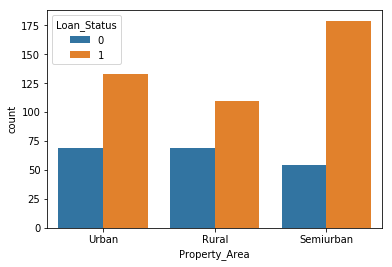

In [18]:
#plt.subplots(figsize=(20,10))
sns.countplot(x="Property_Area", hue="Loan_Status", data = train)
plt.show()

In [19]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

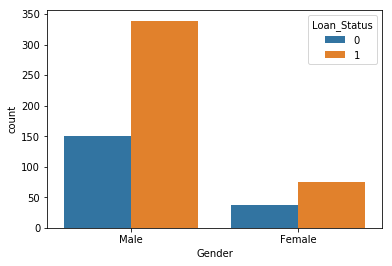

In [20]:
sns.countplot(x="Gender", hue="Loan_Status", data = train)
plt.show()

In [21]:
train.Gender.unique()


array(['Male', 'Female', nan], dtype=object)

In [24]:
len(train.Credit_History.unique())


2

In [23]:
train.Credit_History.fillna(train.Loan_Status, inplace = True)

In [25]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
...                          "bar", "bar", "bar", "bar"],
...                    "B": ["one", "one", "one", "two", "two",
...                          "one", "one", "two", "two"],
...                    "C": ["small", "large", "large", "small",
...                          "small", "large", "small", "small",
...                          "large"],
...                    "D": [1, 2, 2, 3, 3, 4, 5, 6, 7]})

In [31]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
...                     aggfunc=np.sum)


In [32]:
table


D
A   B      
bar one   9
    two  13
foo one   5
    two   6

In [33]:
df

,A,B,C,D
0,foo,one,small,1
1,foo,one,large,2
2,foo,one,large,2
3,foo,two,small,3
4,foo,two,small,3
5,bar,one,large,4
6,bar,one,small,5
7,bar,two,small,6
8,bar,two,large,7


In [34]:
total = pd.concat([train,test])

In [38]:
total.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        29
Dependents            24
Education              0
Gender                 0
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          356
Married                3
Property_Area          0
Self_Employed         55
dtype: int64

In [36]:
train_len = train.shape[0]

In [37]:
total[total.Gender.isnull()] = "missing"

In [39]:
total.shape


(981, 13)

In [40]:
total.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0,1,0,Graduate,Male,NaN,360,LP001002,1,No,Urban,No
1,4583,1508,1,1,Graduate,Male,128,360,LP001003,0,Yes,Rural,No
2,3000,0,1,0,Graduate,Male,66,360,LP001005,1,Yes,Urban,Yes
3,2583,2358,1,0,Not Graduate,Male,120,360,LP001006,1,Yes,Urban,No
4,6000,0,1,0,Graduate,Male,141,360,LP001008,1,No,Urban,No


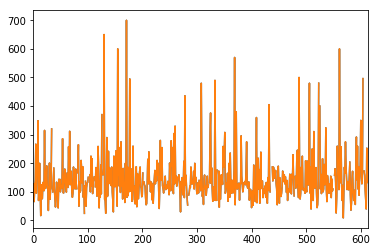

In [42]:
train.LoanAmount.plot()
plt.show()

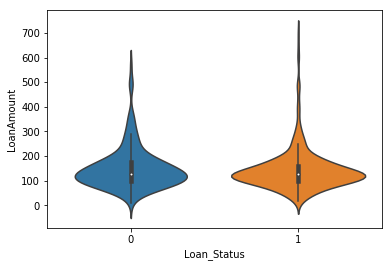

In [48]:
sns.violinplot(y="LoanAmount",x="Loan_Status", data=train)
plt.show()

In [54]:
len(train.Loan_Status[(train.LoanAmount>350) & (train.Loan_Status==1)])

13

In [55]:
len(train.Loan_Status[(train.LoanAmount>350)])

19